In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd

In [2]:
def PlotMap(data,year=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 0.0  # Minimum value for the color scale
    vmax = 10.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Average Yearly Rainfall Data of {year} from June to September')

In [3]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 1\IndianRainfall_JJAS_Zone1_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 2\IndianRainfall_JJAS_Zone2_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 3\IndianRainfall_JJAS_Zone3_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 4\IndianRainfall_JJAS_Zone4_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 5\IndianRainfall_JJAS_Zone5_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Zonal Data\Zone 6\IndianRainfall_JJAS_Zone6_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))



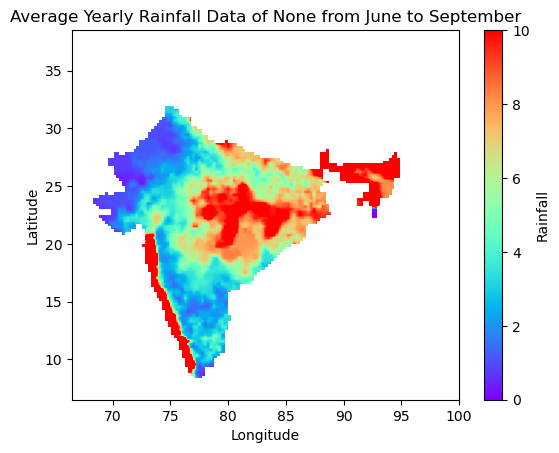

In [10]:
zz=zone1[0].combine_first(zone2[0].combine_first(zone3[0].combine_first(zone4[0].combine_first(zone5[0].combine_first(zone6[0])))))
PlotMap(zz.to_array()[0])

Zone 1 mean :  <xarray.DataArray 'rain' ()>
array(3.699548)
Zone 2 mean :  <xarray.DataArray 'rain' ()>
array(8.08151751)
Zone 3 mean :  <xarray.DataArray 'rain' ()>
array(4.26779623)
Zone 4 mean :  <xarray.DataArray 'rain' ()>
array(12.30605092)
Zone 5 mean :  <xarray.DataArray 'rain' ()>
array(7.19094622)
Zone 6 mean :  <xarray.DataArray 'rain' ()>
array(21.20218589)


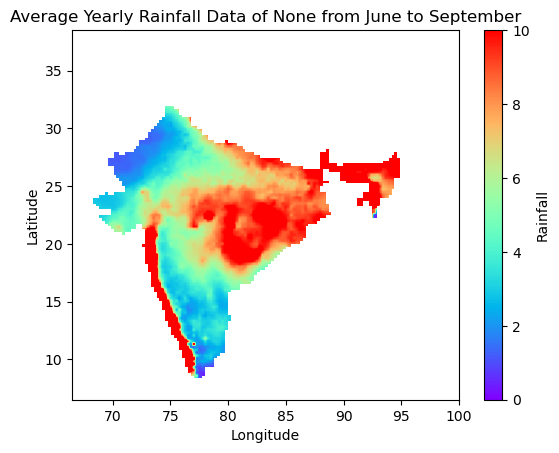

In [11]:
#Find the climatological mean i.e a mean of 
combined_data_zone1 = xarray.concat(zone1, dim='years')
mean_zone1_map = combined_data_zone1['rain'].mean(dim='years')

combined_data_zone2 = xarray.concat(zone2, dim='years')
mean_zone2_map = combined_data_zone2['rain'].mean(dim='years')

combined_data_zone3 = xarray.concat(zone3, dim='years')
mean_zone3_map = combined_data_zone3['rain'].mean(dim='years')

combined_data_zone4 = xarray.concat(zone4, dim='years')
mean_zone4_map = combined_data_zone4['rain'].mean(dim='years')

combined_data_zone5 = xarray.concat(zone5, dim='years')
mean_zone5_map = combined_data_zone5['rain'].mean(dim='years')

combined_data_zone6 = xarray.concat(zone6, dim='years')
mean_zone6_map = combined_data_zone6['rain'].mean(dim='years')

fullMap_climatological_mean=mean_zone1_map.combine_first(mean_zone2_map.combine_first(mean_zone3_map.combine_first(mean_zone4_map.combine_first(mean_zone5_map.combine_first(mean_zone6_map)))))
PlotMap(fullMap_climatological_mean)

In [14]:
#Finding each zone anomaly
zone1_anomaly_map=[]
zone2_anomaly_map=[]
zone3_anomaly_map=[]
zone4_anomaly_map=[]
zone5_anomaly_map=[]
zone6_anomaly_map=[]

zone1_anomaly_number=[]
zone2_anomaly_number=[]
zone3_anomaly_number=[]
zone4_anomaly_number=[]
zone5_anomaly_number=[]
zone6_anomaly_number=[]

for i in range(len(zone1)):
    zone1_anomaly_map.append(zone1[i]-mean_zone1_map)
    zone1_anomaly_number.append(zone1_anomaly_map[i].mean())

    zone2_anomaly_map.append(zone2[i]-mean_zone2_map)
    zone2_anomaly_number.append(zone2_anomaly_map[i].mean())

    zone3_anomaly_map.append(zone3[i]-mean_zone3_map)
    zone3_anomaly_number.append(zone3_anomaly_map[i].mean())
    
    zone4_anomaly_map.append(zone4[i]-mean_zone4_map)
    zone4_anomaly_number.append(zone4_anomaly_map[i].mean())
    
    zone5_anomaly_map.append(zone5[i]-mean_zone5_map)
    zone5_anomaly_number.append(zone5_anomaly_map[i].mean())
    
    zone6_anomaly_map.append(zone6[i]-mean_zone6_map)
    zone6_anomaly_number.append(zone6_anomaly_map[i].mean())


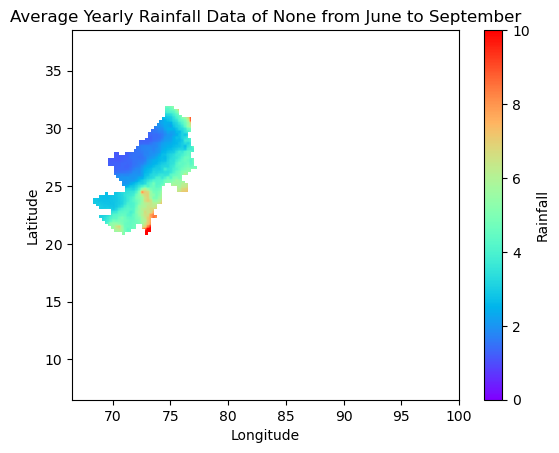

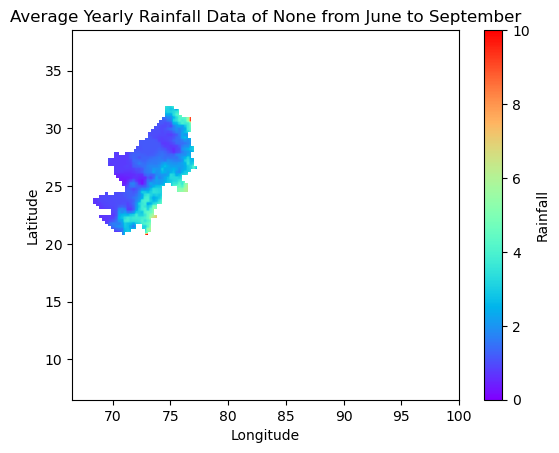

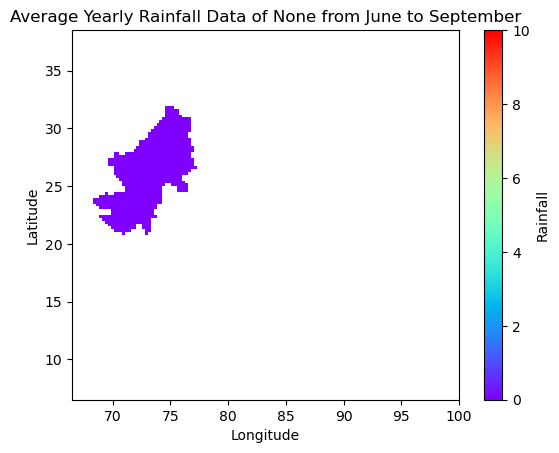

In [15]:
PlotMap(mean_zone1_map)
PlotMap(zone1[0].to_array()[0])
PlotMap(zone1[0].to_array()[0] - mean_zone1_map)

In [20]:
year=1901
for i in range(len(zone1)):
    zone1_anomaly_map[i].to_netcdf(f'Zone1_Anomaly_{year}.nc')
    zone2_anomaly_map[i].to_netcdf(f'Zone2_Anomaly_{year}.nc')
    zone3_anomaly_map[i].to_netcdf(f'Zone3_Anomaly_{year}.nc')
    zone4_anomaly_map[i].to_netcdf(f'Zone4_Anomaly_{year}.nc')
    zone5_anomaly_map[i].to_netcdf(f'Zone5_Anomaly_{year}.nc')
    zone6_anomaly_map[i].to_netcdf(f'Zone6_Anomaly_{year}.nc')
    year+=1
    